In [1]:
import networkx as nx
import pulp

# Compatibility graph

In [2]:
G=nx.Graph()

G.add_edge('a','b')

G.add_edge('b','f')
G.add_edge('b','g')
G.add_edge('b','j')

G.add_edge('c','e')
G.add_edge('c','g')
G.add_edge('c','h')
G.add_edge('c','i')
G.add_edge('c','j')

G.add_edge('d','e')
G.add_edge('d','g')
G.add_edge('d','j')
G.add_edge('d','h')

G.add_edge('e','i')

G.add_edge('f','g')
G.add_edge('f','j')

G.add_edge('g','h')
G.add_edge('g','i')

G.add_edge('h','i')

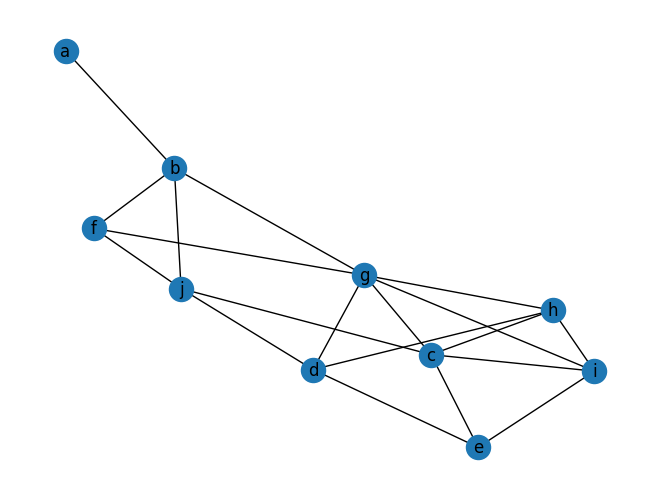

In [3]:
nx.draw(G,with_labels=True)

# Maximal cliques

In [3]:
list(nx.find_cliques(G))

[['g', 'h', 'd'],
 ['g', 'h', 'c', 'i'],
 ['g', 'b', 'f'],
 ['e', 'd'],
 ['e', 'c', 'i'],
 ['a', 'b'],
 ['j', 'd'],
 ['j', 'f', 'b'],
 ['j', 'c']]

In [15]:
K=list(k for k in nx.enumerate_all_cliques(G) if len(k)>1)

In [16]:
K

[['a', 'b'],
 ['b', 'f'],
 ['b', 'g'],
 ['b', 'j'],
 ['f', 'g'],
 ['f', 'j'],
 ['g', 'c'],
 ['g', 'h'],
 ['g', 'i'],
 ['g', 'd'],
 ['j', 'c'],
 ['j', 'd'],
 ['c', 'e'],
 ['c', 'h'],
 ['c', 'i'],
 ['e', 'i'],
 ['e', 'd'],
 ['h', 'i'],
 ['h', 'd'],
 ['b', 'f', 'g'],
 ['b', 'f', 'j'],
 ['g', 'c', 'h'],
 ['g', 'c', 'i'],
 ['g', 'h', 'i'],
 ['g', 'h', 'd'],
 ['c', 'e', 'i'],
 ['c', 'h', 'i'],
 ['g', 'c', 'h', 'i']]

In [70]:
K=[['g','h','i'],['g','b','f'],['a','b'],['b','j'],['c','j'],['d','j'],['d','e'],['e','i']]

In [17]:
cliques=dict(zip(
    [k for k in range(1,len(K)+1)],
    K
))
cliques

{1: ['a', 'b'],
 2: ['b', 'f'],
 3: ['b', 'g'],
 4: ['b', 'j'],
 5: ['f', 'g'],
 6: ['f', 'j'],
 7: ['g', 'c'],
 8: ['g', 'h'],
 9: ['g', 'i'],
 10: ['g', 'd'],
 11: ['j', 'c'],
 12: ['j', 'd'],
 13: ['c', 'e'],
 14: ['c', 'h'],
 15: ['c', 'i'],
 16: ['e', 'i'],
 17: ['e', 'd'],
 18: ['h', 'i'],
 19: ['h', 'd'],
 20: ['b', 'f', 'g'],
 21: ['b', 'f', 'j'],
 22: ['g', 'c', 'h'],
 23: ['g', 'c', 'i'],
 24: ['g', 'h', 'i'],
 25: ['g', 'h', 'd'],
 26: ['c', 'e', 'i'],
 27: ['c', 'h', 'i'],
 28: ['g', 'c', 'h', 'i']}

In [18]:
H={}
for m in G.nodes():
    H[m]=[]
    for k in cliques:
        if m in cliques[k]:
            H[m].append(k)
H           

{'a': [1],
 'b': [1, 2, 3, 4, 20, 21],
 'f': [2, 5, 6, 20, 21],
 'g': [3, 5, 7, 8, 9, 10, 20, 22, 23, 24, 25, 28],
 'j': [4, 6, 11, 12, 21],
 'c': [7, 11, 13, 14, 15, 22, 23, 26, 27, 28],
 'e': [13, 16, 17, 26],
 'h': [8, 14, 18, 19, 22, 24, 25, 27, 28],
 'i': [9, 15, 16, 18, 23, 24, 26, 27, 28],
 'd': [10, 12, 17, 19, 25]}

# Circular layout

In [56]:
prob=pulp.LpProblem("circular_cliques",pulp.LpMaximize)
z=pulp.LpVariable.dicts("z",(cliques,cliques),cat=pulp.LpBinary)
y=pulp.LpVariable.dicts("y",cliques,cat=pulp.LpBinary)
u=pulp.LpVariable.dicts("u",cliques,lowBound=1,upBound=len(cliques),cat=pulp.LpInteger)
prob+=pulp.lpSum(len(cliques[k])*y[k] for k in y)
for j in cliques:
    prob+=pulp.lpSum(z[i][j] for i in z)==y[j]
for i in cliques:
    prob+=pulp.lpSum(z[i][j] for j in z[i])==y[i]
    prob+=z[i][i]==0
for m in G.nodes():
    #prob+=pulp.lpSum(z[i][j] + z[j][i] for i in H[m] for j in H[m] if i<j)>= len(H[m])-1 
    prob+=pulp.lpSum(z[i][j] + z[j][i] for i in H[m] for j in H[m] if i<j)>= pulp.lpSum(y[k] for k in cliques if m in cliques[k])-1
    #prob+=pulp.lpSum(y[k] for k in cliques if m in cliques[k])>=1
for i in cliques:
    for j in cliques:
        if j>1:
            prob+= u[i]+1-u[j]<=len(cliques)*(1-z[i][j]) 
prob+=pulp.lpSum(y)==8
            

In [57]:
#prob

In [58]:
prob.solve()
pulp.LpStatus[prob.status]

'Optimal'

In [59]:
for i in y:
    val = pulp.value(y[i])
    if val >0.9:
        print(cliques[i])

['a', 'b']
['b', 'f', 'g']
['b', 'f', 'j']
['g', 'h', 'i']
['g', 'h', 'd']
['c', 'e', 'i']
['c', 'h', 'i']
['g', 'c', 'h', 'i']


In [60]:
for i in cliques:
    val = pulp.value(y[i])
    if val >0.9:
        print(cliques[i],pulp.value(u[i]))

['a', 'b'] 1.0
['b', 'f', 'g'] 3.0
['b', 'f', 'j'] 2.0
['g', 'h', 'i'] 5.0
['g', 'h', 'd'] 4.0
['c', 'e', 'i'] 8.0
['c', 'h', 'i'] 7.0
['g', 'c', 'h', 'i'] 6.0


In [61]:
for i in cliques:
    for j in cliques:
        if pulp.value(z[i][j])>0.9:
            print(cliques[i],cliques[j])

['a', 'b'] ['b', 'f', 'j']
['b', 'f', 'g'] ['g', 'h', 'd']
['b', 'f', 'j'] ['b', 'f', 'g']
['g', 'h', 'i'] ['g', 'c', 'h', 'i']
['g', 'h', 'd'] ['g', 'h', 'i']
['c', 'e', 'i'] ['a', 'b']
['c', 'h', 'i'] ['c', 'e', 'i']
['g', 'c', 'h', 'i'] ['c', 'h', 'i']


In [62]:
selected_cliques=[k for k in cliques if pulp.value(y[k])>0.9]

In [63]:
selected_cliques

[1, 20, 21, 24, 25, 26, 27, 28]

# Circular layout II

In [121]:
k=[_ for _ in range(1,9)]
prob=pulp.LpProblem("circular_cliques",pulp.LpMaximize)
z=pulp.LpVariable.dicts("z",(k,k),cat=pulp.LpBinary)
y=pulp.LpVariable.dicts("y",k,cat=pulp.LpBinary)
u=pulp.LpVariable.dicts("u",k,lowBound=1,upBound=len(k),cat=pulp.LpInteger)
x=pulp.LpVariable.dicts("x",(G.nodes(),k),cat=pulp.LpBinary)
w=pulp.LpVariable.dicts("w",(k,k,G.nodes()),cat=pulp.LpBinary)
prob+=pulp.lpSum(x)
for m in G.nodes():
    prob+=pulp.lpSum(x[m][i] for i in k)>=1
for i in k:
    for m in G.nodes():
        for n in G.nodes():
            if m!=n:
                if (m,n) not in G.edges() and (n,m) not in G.edges():
                    prob+=x[m][i]+x[n][i]<=y[i]
for i in k:
    if i>1:
        prob+=y[i]<=y[i-1]
    prob+=2*y[i]<=pulp.lpSum(x[m][i] for m in G.nodes())
    prob+=pulp.lpSum(x[m][i] for m in G.nodes())<=3*y[i]

for j in k:
    prob+=pulp.lpSum(z[i][j] for i in z)==y[j]
for i in k:
    prob+=pulp.lpSum(z[i][j] for j in z[i])==y[i]
    prob+=z[i][i]==0
for m in G.nodes():
    prob+=pulp.lpSum(w[i][j][m] for i in k for j in k if i<j)>=pulp.lpSum(x[m][i] for i in k)-1
for i in k:
    for j in k:
        for m in G.nodes():
            prob+=w[i][j][m]<=z[i][j]+z[j][i]
            prob+=w[i][j][m]<=x[m][i]
            prob+=w[i][j][m]<=x[m][j]
for i in k:
    for j in k:
        if j>1:
            prob+= u[i]+1-u[j]<=len(k)*(1-z[i][j])
            
prob+=x["g"][1]==1
prob+=x["h"][1]==1
prob+=x["i"][1]==1
prob+=x["f"][2]==1
prob+=x["b"][2]==1
prob+=x["g"][2]==1
prob+=x["a"][3]==1
prob+=x["b"][3]==1
prob+=x["j"][4]==1
prob+=x["b"][4]==1
prob+=x["j"][5]==1
prob+=x["c"][5]==1
prob+=x["j"][6]==1
prob+=x["d"][6]==1
#prob+=x["e"][7]==1
#prob+=x["d"][7]==1
#prob+=x["e"][8]==1
#prob+=x["i"][8]==1

In [122]:
prob.solve()
pulp.LpStatus[prob.status]

'Optimal'

In [123]:
for i in k:
    print("clique",i)
    print("=========")
    for m in G.nodes():
        val=pulp.value(x[m][i])
        if val>0.9:
            print(m)

clique 1
g
h
i
clique 2
b
f
g
clique 3
a
b
clique 4
b
j
clique 5
j
c
clique 6
j
d
clique 7
c
e
i
clique 8
g
h
i


In [117]:
for i in u:
    print("clique",i,[v for v in G.nodes() if pulp.value(x[v][i])>0.9],"in position",pulp.value(u[i]))

clique 1 ['g', 'h', 'i'] in position 1.0
clique 2 ['b', 'f', 'g'] in position 8.0
clique 3 ['a', 'b'] in position 7.0
clique 4 ['b', 'j'] in position 6.0
clique 5 ['j', 'c'] in position 5.0
clique 6 ['j', 'd'] in position 4.0
clique 7 ['e', 'd'] in position 3.0
clique 8 ['e', 'i'] in position 2.0


In [67]:
#prob

# Maximize green light time

In [64]:
prob=pulp.LpProblem("green",pulp.LpMaximize)
t=pulp.LpVariable.dicts("t",selected_cliques,lowBound=0,cat=pulp.LpContinuous)
prob+=pulp.lpSum(t[i] for m in G.nodes() for i in selected_cliques if i in H[m])
prob+=pulp.lpSum(t[i] for i in selected_cliques)==60
for m in G.nodes():
    prob+=pulp.lpSum(t[i] for i in selected_cliques if i in H[m])>=10

In [65]:
prob.solve()
pulp.LpStatus[prob.status]

'Optimal'

In [66]:
for i in selected_cliques:
    print(i,pulp.value(t[i]))

1 10.0
20 0.0
21 10.0
24 0.0
25 10.0
26 10.0
27 0.0
28 20.0


In [67]:
for m in G.nodes():
    print(m,pulp.lpSum(pulp.value(t[i]) for i in selected_cliques if i in H[m]))

a 10.0
b 20.0
f 10.0
g 30.0
j 10.0
c 30.0
e 10.0
h 30.0
i 30.0
d 10.0


In [70]:
#prob